In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

In [ ]:
#Comprobación existencia valores nulos
df.isna().sum()
# Limpiar valores nulos:
df_purged=df.dropna()
df_purged.isna().sum()

In [ ]:
# Comprobamos si existen valores duplicados
df_purged.duplicated().sum()



In [62]:
#  Crear una copia explícita del DataFrame
df_purged = df_purged.copy()

In [63]:
# Eliminar data no relevante 
    #  Columna con la url de los banners
df_purged.drop('banner_image', axis=1, inplace=True)
    #  Columna nombre del creador
df_purged.drop('creator_name', axis=1, inplace=True)
    #  Columna fecha de creacion
df_purged.drop('created_date', axis=1, inplace=True) 
df_purged


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0
...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1


DETECCION IDIOMAS PETICIONES

In [64]:
%pip install nltk
%pip install langdetect
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/zuzu9627/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zuzu9627/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
from langdetect import detect

def detect_language(text):
    # Tokenización de palabras
    tokens = word_tokenize(text.lower())

    # Lematización de palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Detección del idioma
    language = detect(' '.join(tokens))
    return language


[nltk_data] Downloading package omw-1.4 to /home/zuzu9627/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [67]:
# Creamos una columna donde guardamos el idioma de la peticion
df_purged['language'] = df_purged['title'].apply(detect_language)
df_purged

,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


In [68]:
# Lista de idiomas de las peticiones
df_purged['language'].unique()

array(['en', 'lt', 'es', 'fr', 'it', 'pt', 'ja', 'nl', 'fi', 'no', 'et',
       'tl', 'af', 'id', 'ru', 'da', 'ro', 'ca', 'de', 'hr', 'sl', 'bg',
       'pl', 'sk', 'cy', 'th', 'tr', 'ar', 'sv'], dtype=object)

In [69]:
# Numerar los 5 idiomas con mayores peticiones
df_purged['language'].value_counts().head()

en    1365
fr     143
it      88
es      33
ru      26
Name: language, dtype: int64

In [70]:
# Obtener los 5 idiomas más usados
top_languages = df_purged['language'].value_counts().head(5).index.tolist()

# Filtrar el DataFrame para incluir solo las peticiones en los 5 idiomas más utilizados
df_filtered = df_purged[df_purged['language'].isin(top_languages)]

# Imprimir el DataFrame filtrado
(df_filtered)


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


In [71]:
# Comprobación solidez de datos y consistencia
# Extraer solo el país de la columna 'creator_location'
df_filtered['creator_location'] = df_filtered['creator_location'].str.split(',').str[-1].str.strip()
df_filtered['creator_location'].value_counts()
df_filtered

/tmp/ipykernel_11594/1994244992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['creator_location'] = df_filtered['creator_location'].str.split(',').str[-1].str.strip()


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],United States,71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


In [89]:
df_filtered.dtypes

train_idx                     int64
title                        object
description                  object
target                       object
creator_location             object
supporters                    int64
full_content                 object
victory_flag                  int64
language                     object
title_translated             object
title_cleaned                object
title_cleaned_nostopwords    object
dtype: object

## TRADUCIR AL INGLÉS LAS PETICIONES

In [72]:
%pip install googletrans==3.1.0a0

Note: you may need to restart the kernel to use updated packages.


In [77]:
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])
import pandas as pd

# Definir una función para traducir una columna
def translate_column(column):
    translated_column = []
    for text in column:
        translation = translator.translate(text,dest='en').text
        translated_column.append(translation)
    return translated_column
# 
# Traducir la columna 'title' y almacenar los resultados en una nueva columna
df_filtered["title_translated"] = translate_column(df_filtered["title"])

# Traducir la columna 'description' y almacenar los resultados en una nueva columna
# df_filtered["description_translated"] = translate_column(df_filtered["description"])

# Traducir la columna 'full_content' y almacenar los resultados en una nueva columna
# df_filtered["full_content_translated"] = translate_column(df_filtered["full_content"])

# Mostrar el dataframe resultante
df_filtered


/tmp/ipykernel_11594/2547694367.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["title_translated"] = translate_column(df_filtered["title"])


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language,title_translated
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en,Stop Iran Regime from Chairing U​.​N. Human Ri...
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en,Save Children In Poverty In Syria
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en,Mobile operators are creating inequality
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en,Grant Military Burial Honors to Women WWII Pilots
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en,Don't Violate the Charter of Rights
...,...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr,Justice pour Fortune
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en,100% Clean Renewable Energy by 2030.
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en,Create a Fair and Compassionate UK Immigration...
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],United States,71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en,Approve my Social Security Disability


### ELIMINAR PALABRAS IRRELEVANTES (STOPWORDS)

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar los stopwords si aún no están descargados
nltk.download('stopwords')

# Obtener los stopwords en el idioma deseado (en este caso, inglés)
stop_words = set(stopwords.words('english'))

# Definir una función para eliminar las palabras irrelevantes de un texto
def remove_stopwords(text):
    tokens = word_tokenize(text.upper())
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Aplicar la función remove_stopwords a la columna 'title_translated' del dataframe df_filtered
df_filtered['title_cleaned_nostopwords'] = df_filtered['title_translated'].apply(remove_stopwords)

# Mostrar el dataframe resultante
df_filtered


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_11594/2387263031.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['title_cleaned_nostopwords'] = df_filtered['title_translated'].apply(remove_stopwords)


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language,title_translated,title_cleaned,title_cleaned_nostopwords
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en,Stop Iran Regime from Chairing U​.​N. Human Ri...,Stop Iran Regime Chairing U​.​N . Human Rights...,STOP IRAN REGIME CHAIRING U​.​N . HUMAN RIGHTS...
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en,Save Children In Poverty In Syria,Save Children Poverty Syria,SAVE CHILDREN POVERTY SYRIA
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en,Mobile operators are creating inequality,Mobile operators creating inequality,MOBILE OPERATORS CREATING INEQUALITY
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en,Grant Military Burial Honors to Women WWII Pilots,Grant Military Burial Honors Women WWII Pilots,GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en,Don't Violate the Charter of Rights,n't Violate Charter Rights,N'T VIOLATE CHARTER RIGHTS
...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr,Justice pour Fortune,Justice pour Fortune,JUSTICE POUR FORTUNE
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en,100% Clean Renewable Energy by 2030.,100 % Clean Renewable Energy 2030 .,100 % CLEAN RENEWABLE ENERGY 2030 .
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en,Create a Fair and Compassionate UK Immigration...,Create Fair Compassionate UK Immigration Policy,CREATE FAIR COMPASSIONATE UK IMMIGRATION POLICY
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],United States,71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en,Approve my Social Security Disability,Approve Social Security Disability,APPROVE SOCIAL SECURITY DISABILITY


### CONTAR LAS PALABRAS MÁS REPETIDAS

#### CON LEMATIZACION

In [82]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Descargar los recursos necesarios para nltk
nltk.download('wordnet')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar una lista de palabras
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Obtener las palabras de la columna 'title_cleaned_nostopwords'
# all_words = ' '.join(df_filtered['title_cleaned_nostopwords']).split()

# Lematizar las palabras
lemmatized_words = lemmatize_words(df_filtered['title_cleaned_nostopwords'])

# Contar la frecuencia de cada palabra lematizada
word_counts = Counter(lemmatized_words)

# Obtener las palabras más repetidas y mostrarlas en orden descendente
most_common_words = word_counts.most_common(20)

# Mostrar las palabras más repetidas
print('Palabras más repetidas (con lematización):')
for word, count in most_common_words:
    print(f'{word}: {count}')


Palabras más repetidas (con lematización):
Immigration Reform: 3
Civilian oversight changes police misconduct corruption investigations: 3
Campaign Commissioner Mental Health Disability NI: 2
Roseanne facing lifetime prison disability . Stop neglect .: 2
Add Mental Health Education mandatory teaching curriculum schools UK: 2
Make Count : Missing Murdered Indigenous Women: 2
Niamh 's Law : Mandatory disability awareness training public facing staff: 2
Policy Change Bears ! BC Conservation Office Service: 2
Reauthorize Land Water Conservation Fund: 2
Demand racial data police involved deaths Canada: 2
Petition get Mental Health Education curriculum: 2
STOP Racial Discrimination Indigenous Groups Philippines: 2
Create 5th Emergency Service Mental Health Crisis Intervention: 2
Protect Women Gender Based Violence/ STOP Femicide: 2
Ban Conversion Therapy Michigan : Pass HB 4515 SB 284: 2
Animal Rights Campaign Egypt: 2
Tell Electronic Arts Oppose Internet Censorship: 2
Save Amazon Justice In

[nltk_data] Downloading package wordnet to /home/zuzu9627/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### SOLO PALABRAS MÁS UTILIZADAS

In [91]:
import re
from collections import Counter

# Unir todas las palabras en una lista y eliminar los signos de puntuación
all_words = ' '.join(df_filtered['title_cleaned_nostopwords'])
all_words = re.findall(r'\b\w{2,}\b', all_words)

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words)

# Obtener las palabras más repetidas y mostrarlas en orden descendente
most_common_words = word_counts.most_common(20)

# Mostrar las palabras más repetidas
print('Palabras más repetidas:')
for word, count in most_common_words:
    print(f'{word}: {count}')



Palabras más repetidas:
STOP: 228
HEALTH: 146
MENTAL: 99
JUSTICE: 96
SAVE: 91
EDUCATION: 89
WOMEN: 81
RIGHTS: 78
RACIAL: 72
CARE: 71
INDIGENOUS: 70
ARTS: 69
HOUSING: 66
IMMIGRATION: 64
POLICE: 62
DISABILITY: 60
CONSERVATION: 56
SUPPORT: 55
PROTECT: 52
BULLYING: 52


#### PLOTEAR IMAGEN CON PALABRAS MAS REPETIDAS

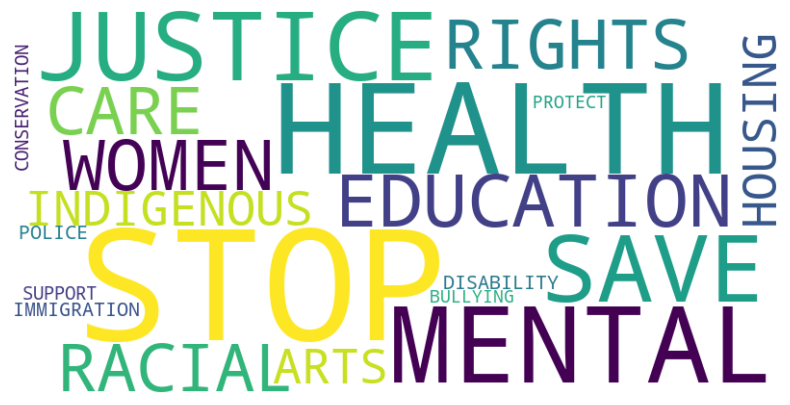

In [94]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear una wordcloud con las palabras más repetidas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Mostrar la wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## PARA MODELO 

In [108]:
# ATRIBUTOS MÁS IMPORTANTES
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Crear una matriz TF-IDF a partir de los campos de texto relevantes
tfidf = TfidfVectorizer()
text_features = tfidf.fit_transform(df_purged['full_content'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(text_features, df_purged['victory_flag'], test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.coef_[0]

# Crear un DataFrame con las características y sus importancias
feature_df = pd.DataFrame({'Feature': tfidf.get_feature_names_out(), 'Importance': feature_importances})
feature_df = feature_df.sort_values('Importance', ascending=False)

# Imprimir las 10 características más importantes
top_features = feature_df.head(15)
print(top_features)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


        Feature  Importance
34839        my    1.101811
25068       him    0.937658
24894       her    0.857022
25112       his    0.847712
52763      trai    0.846760
56174       was    0.822884
24704        he    0.752928
55222   vhvgjvg    0.718400
32894        me    0.683559
8784       cage    0.670866
42324       put    0.660392
32863  mcdonald    0.645290
12074  congress    0.610260
4377        app    0.602471
32731   matthew    0.595706
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       300
           1       0.00      0.00      0.00        66

    accuracy                           0.82       366
   macro avg       0.41      0.50      0.45       366
weighted avg       0.67      0.82      0.74       366



/home/zuzu9627/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zuzu9627/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zuzu9627/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
